<a href="https://colab.research.google.com/github/SaintNickG/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

* Author- Nicholas Giuffrida




## Project Overview

## Load and Inspect Data

In [1]:
# Import pandas
import pandas as pd
# Import Numpy
import numpy as np
# Save file path for sales predictions
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
# Save Sales as a dataframe
sales = pd.read_csv(fname)

In [2]:
sales_2 = sales.copy()

In [3]:
# Inpsect the data head
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Inspect the data summary
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


> To confirm that the range index is truly 8523 entries, I will also check the last 3 entries, using the .tail() function


In [5]:
# Inspect the data tail
sales.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Clean Data



*   How many rows and columns?





In [6]:
sales.shape

(8523, 12)



*   There are 8,523 rows, and 12 columns





In [7]:
# Check the data types
sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object




*   What are the datatypes of each variable?
**   There are objects, floats, and integer data types  



In [8]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228




*   There are no Unnamed: 0 columns
*   All data types are correct



## Check for duplicate data

*   Are there duplicates? If so, drop any duplicates.



In [9]:
from pandas._libs.hashtable import duplicated
sales.duplicated().sum()

0



*   There are no duplicated rows of data



## Check for missing data

*   Identify missing values.



In [10]:
sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Find the percenteges of missing values



In [11]:
sales.isna().sum() / len(sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64



*   There are 1,463 missing values from Item Weight (17.16%)
*   There are 2,410 missing values from Outle Size (28.28%)



In [12]:
null_sums = sales.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
null_percent = null_sums/len(sales) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [14]:
from pandas.core.groupby.groupby import nullcontext
# Limit view to only columns with missing values
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64



*   Address the missing values by using a placeholder value.



In [15]:
sales['Item_Weight'] = sales['Item_Weight'].fillna(-1)



*   Again, address the missing values by using a placeholder value



In [16]:
sales['Outlet_Size'] = sales['Outlet_Size'].fillna("MISSING")





**Confirm that all missing values have been addressed**







In [17]:
sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##  Find and fix any inconsistent categories of data

In [18]:
# Make a filter to view all remaining string columns
string_cols = sales.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
# View the Value Counts of string columns
for col in string_cols:
  print(f'Value Counts for{col}')
  print(sales[col].value_counts())
  # Add a space to make reading easier
  print('\n')

Value Counts forItem_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts forItem_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts forItem_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts forOutlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0



*   Here we see that the Item Fat Content column has three different values to describe Low Fat, and two different values to describe Regular
** We will address this inconsistancy here



In [20]:
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'low fat':"Low Fat", 'reg':"Regular"})
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64



*   For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [21]:
num_cols = sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
# Create a dictionary to rename the columns
rename_dict = {"Item_Identifier":"Product ID", "Item_Weight":"Weight", "Item_Fat_Content":"Fat Content",
               "Item_Visibility":"Visibility Percentage",
               "Item_Type":"Product Category",
               "Item_MRP":"List Price",
               "Outlet_Identifier":"Store ID",
               "Outlet_Establishment_Year":"Store Established Year",
               "Outlet_Size":"Store Size",
               "Outlet_Location_Type":"Store Location Type",
               "Outlet_Type":"Store Type",
               "Item_Outlet_Sales":"Total Sales by Outlet"}

In [24]:
# Use The rename dictionary to rename the columns
sales = sales.rename(rename_dict,axis=1)
sales.head()

,Product ID,Weight,Fat Content,Visibility Percentage,Product Category,List Price,Store ID,Store Established Year,Store Size,Store Location Type,Store Type,Total Sales by Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

> We will create exploratory visuals to help understand our Data

*   Histograms will help us view the distribution of our data's numerical features

*   Boxplots will be used to view statistical summaries of our numerical features
*   Countplots will be used to view the frequncy of each class of categorical features in our date set

 in our data







> **First we need to import 2 more libraries**





In [25]:
# Import Matplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns



> I will also set seaborn styles to maintain consistant format

*   This is similar to the style used by Sherlin Whaley in the example project






In [26]:
# set the style for seaborn
plt.style.use(['dark_background','seaborn-v0_8-muted', 'seaborn-v0_8-poster'])



> We will start this phase by using histograms to view the distribution of data within our numerical features one at a time


- We will use a histogram to view our item distribution by weight



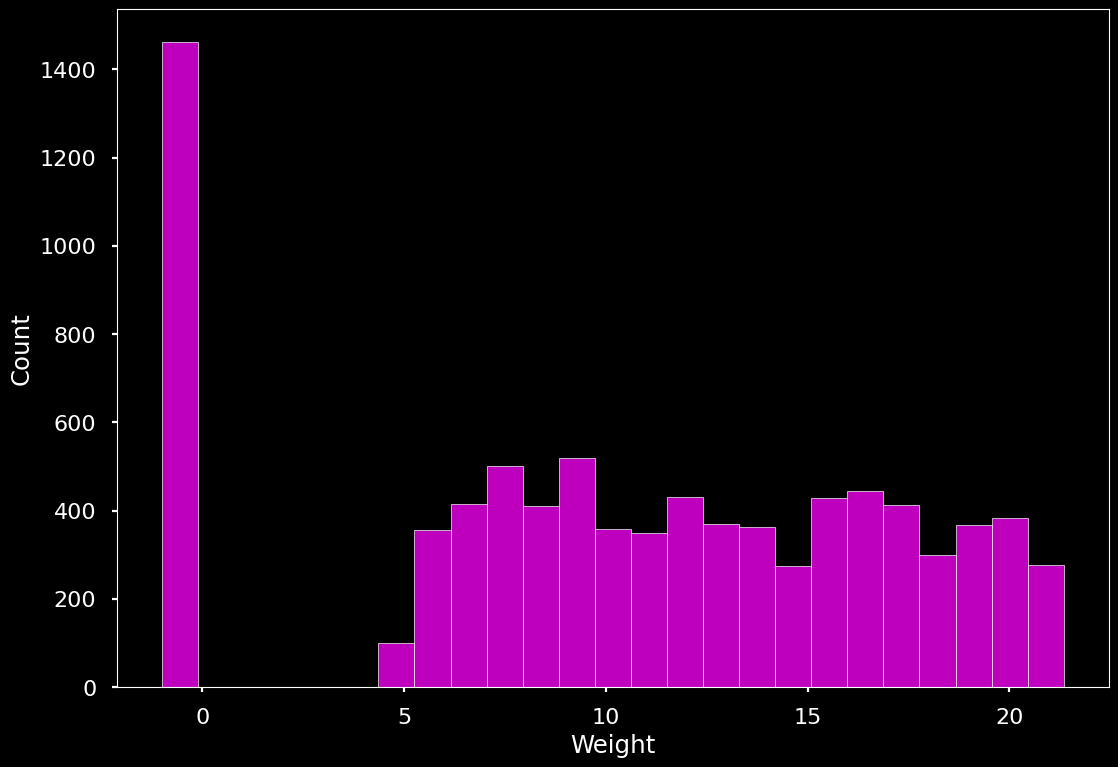

In [27]:
ax = sns.histplot(data = sales, x = "Weight", color = 'Magenta')



> **Apart from the -1 values, which represent our placeholder value, we see a fairly even distribution of our values by weight**



-  We will look at Visibility Percentage as a histogram

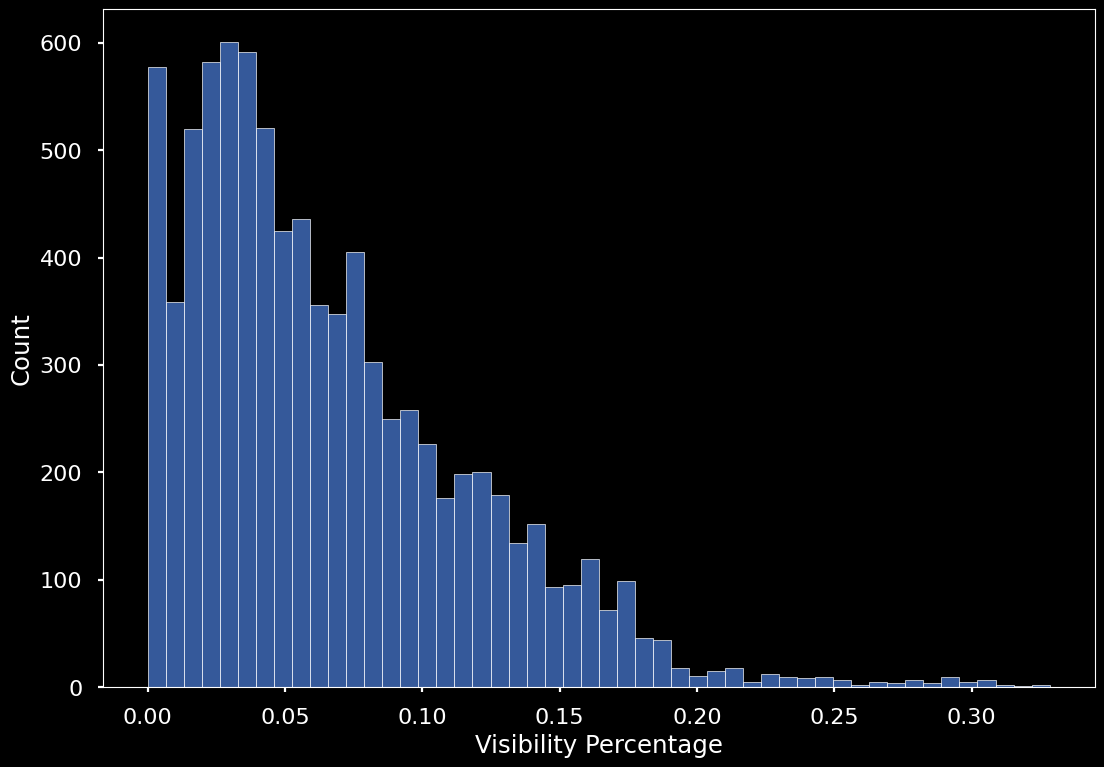

In [28]:
ax = sns.histplot(data = sales, x = "Visibility Percentage")



> **This chart demonstrates a negative correlation between total count and Visibility Percentage**



-  Let's see the distribution of values for List Price

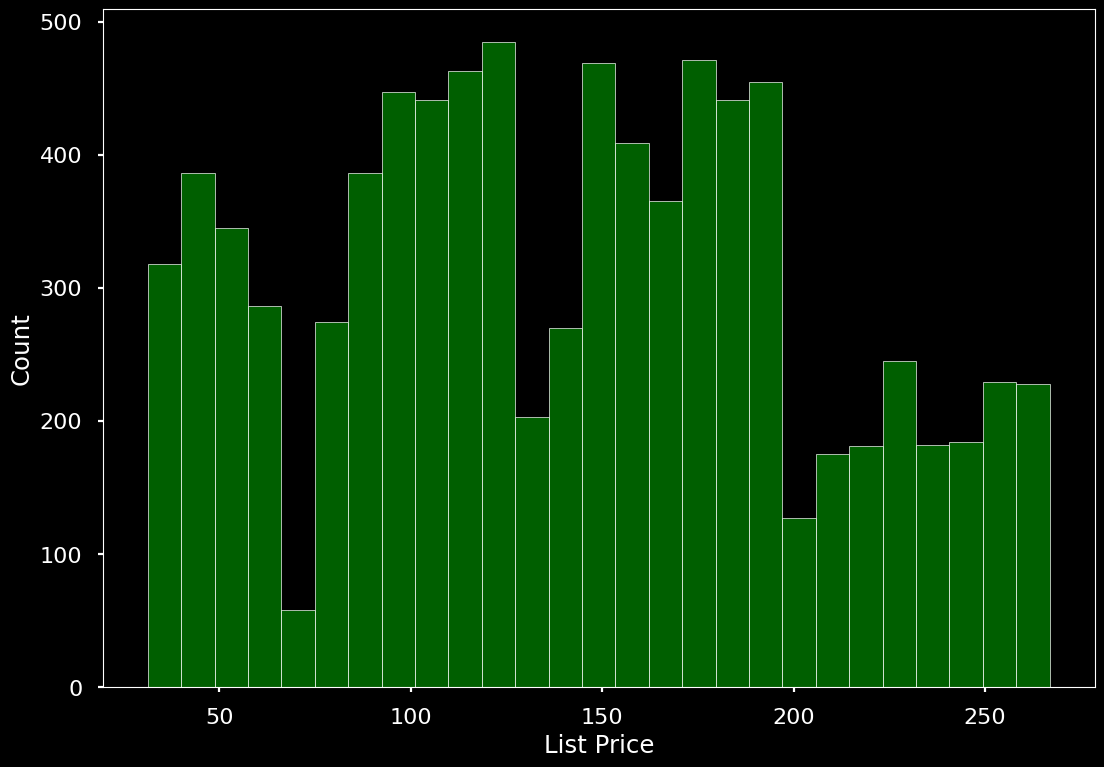

In [29]:
ax = sns.histplot(data = sales, x = "List Price", color = 'Green')




> **This distribution is more random, but seams to peak near the median**



-  We will make a histogram of the Store Established Year column

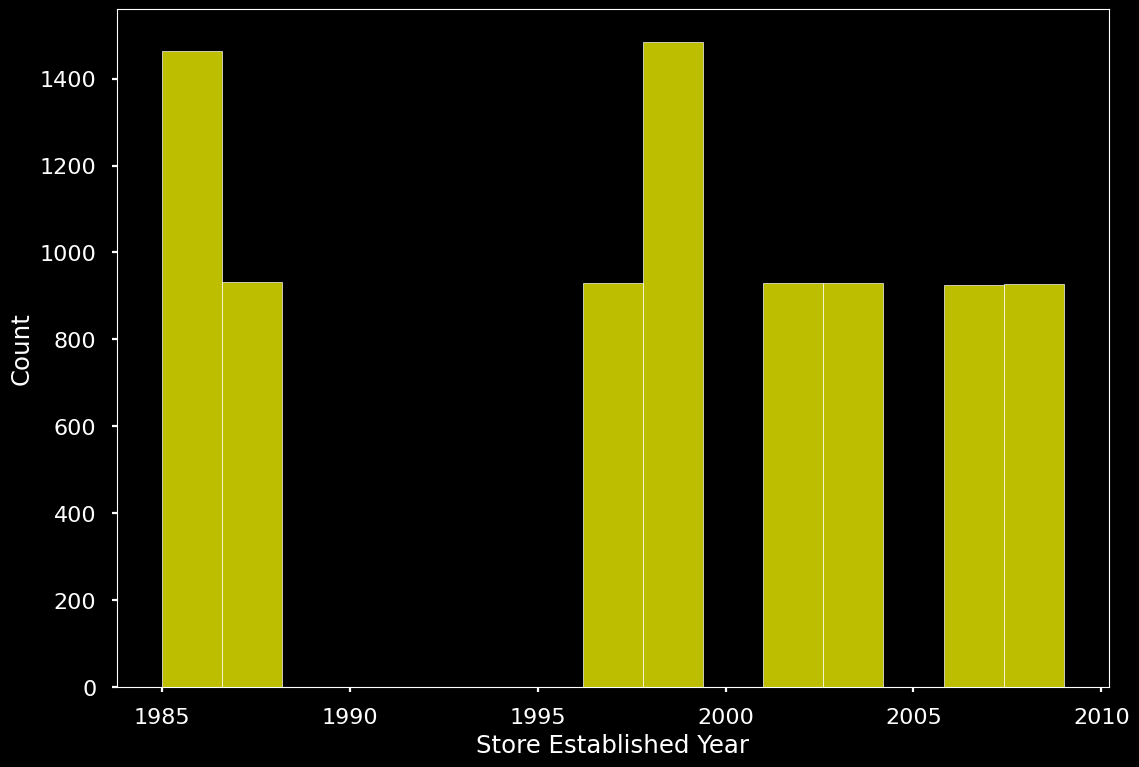

In [30]:
ax = sns.histplot(data = sales, x = "Store Established Year", color = 'Yellow')



> **The large gaps represent years where no stores were established within our data set**



-  And a histogram for Total Sales by Outlet

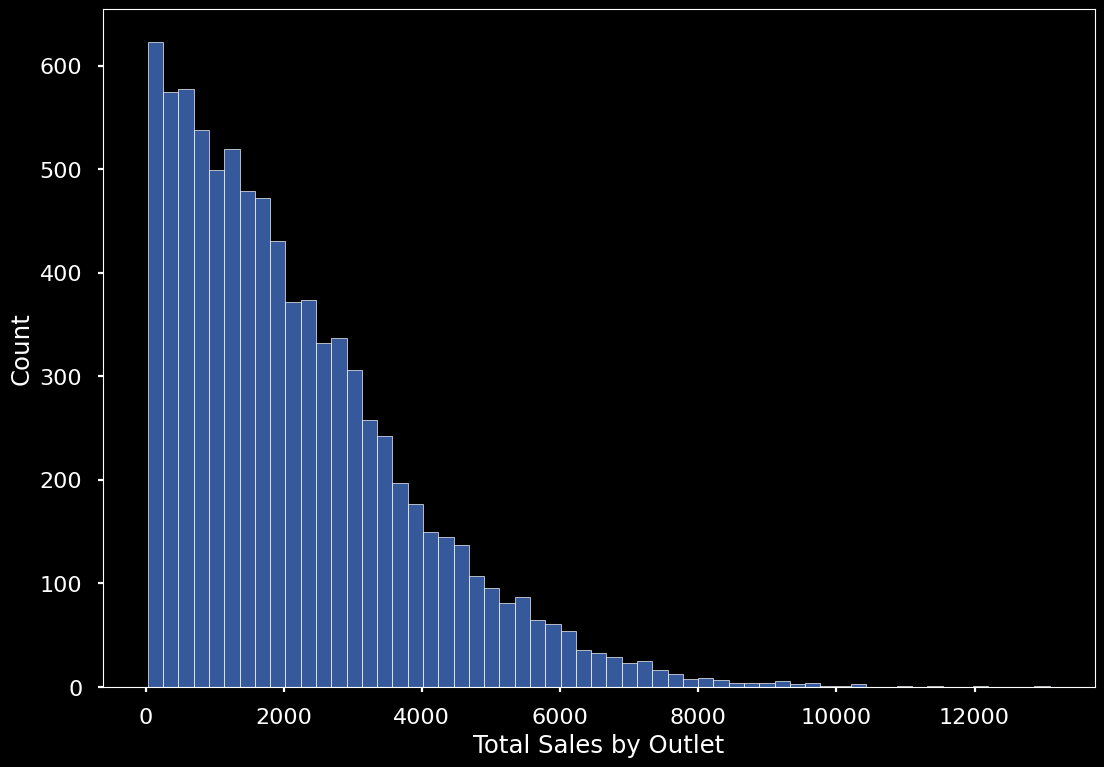

In [31]:
ax = sns.histplot(data = sales, x = "Total Sales by Outlet")



> **Again, similar to Item Visibility, we see negative correlation, but here the correlation is even stronger.**





> Next we will create a boxplot for each numerical feature.

-This will help us to visualize statistical summaries for these cloumns


-  A boxplot for weight





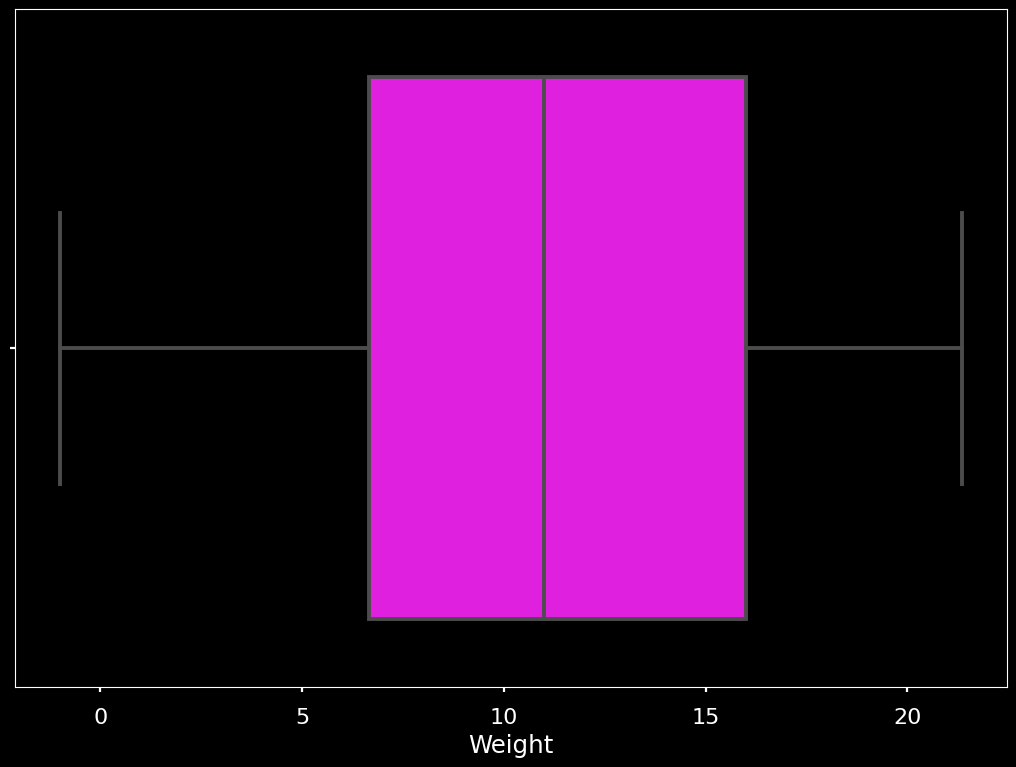

In [32]:
ax = sns.boxplot(data = sales, x = 'Weight', color = 'Magenta')



> **Similar to the histogram for Weight, the boxplot shows a fairly even distribution of values**



-  We will make a boxplot for Visibility percentage, where we would expect to see many more values outside of Q2 and Q3

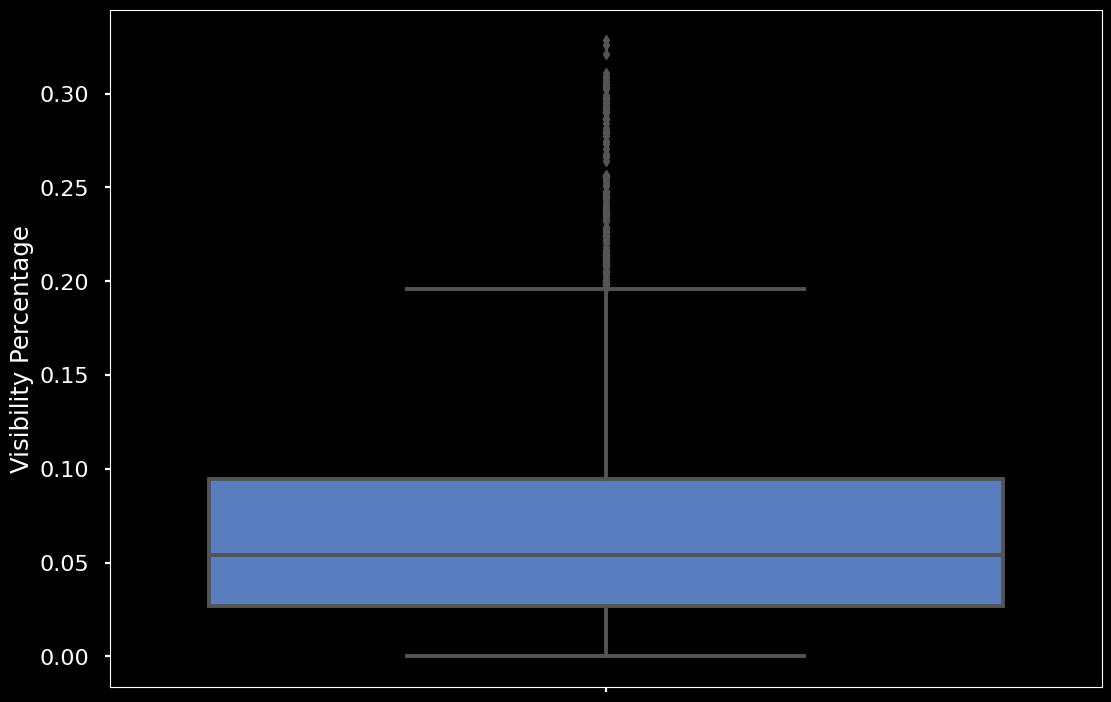

In [33]:
ax = sns.boxplot(data = sales, y = 'Visibility Percentage')





> **As expected we see many outliers, we may later want to compare this column to Total Sales by Outlet to check for correlation**







-  A Boxplot for List Price



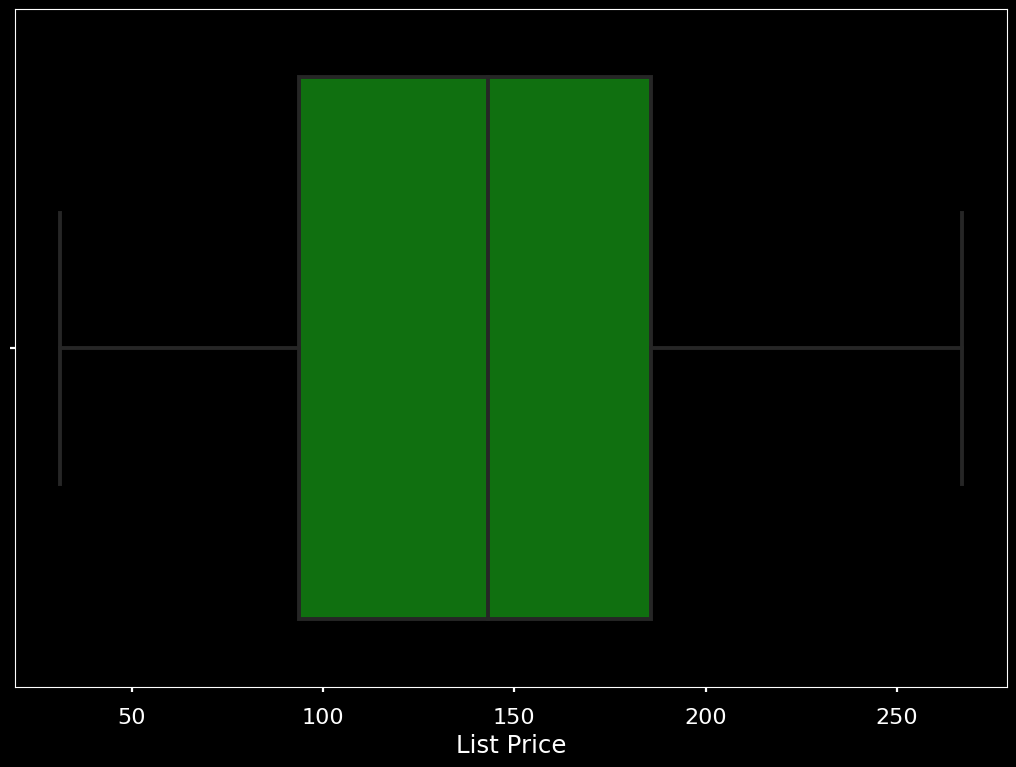

In [34]:
ax = sns.boxplot(data = sales, x = 'List Price', color = "Green")



> **We see again that when the data points are scattered more randomly through the range, the boxplot has little to divulge other than in Q2 and Q3**



-  We make a boxplot for the Store Established Year
 *  It is likely some of these columns will be less useful than others when it comes to explanatory data





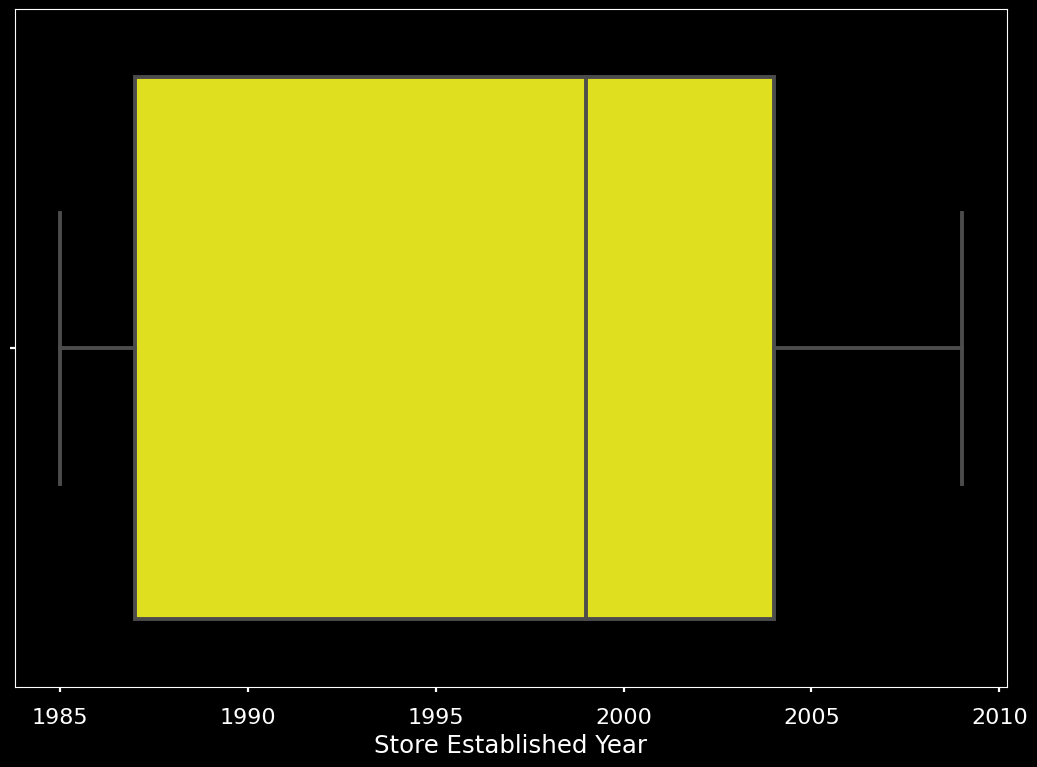

In [35]:
ax= sns.boxplot(data = sales, x = 'Store Established Year', color = 'Yellow')

>  **We can see that most of the data points are concentrated in Q2 of this plot**

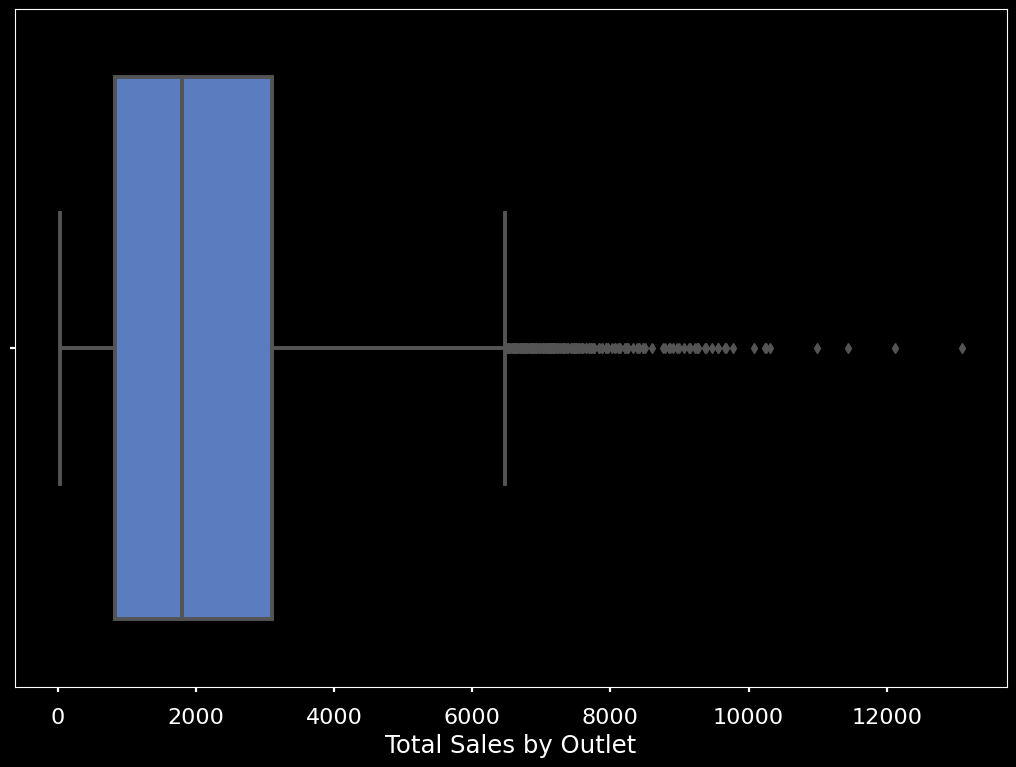

In [36]:
ax = sns.boxplot(data = sales, x = 'Total Sales by Outlet')

*  I will make a regression plot to investigate correlation between Total Sales by Outlet and Visibility Percentage

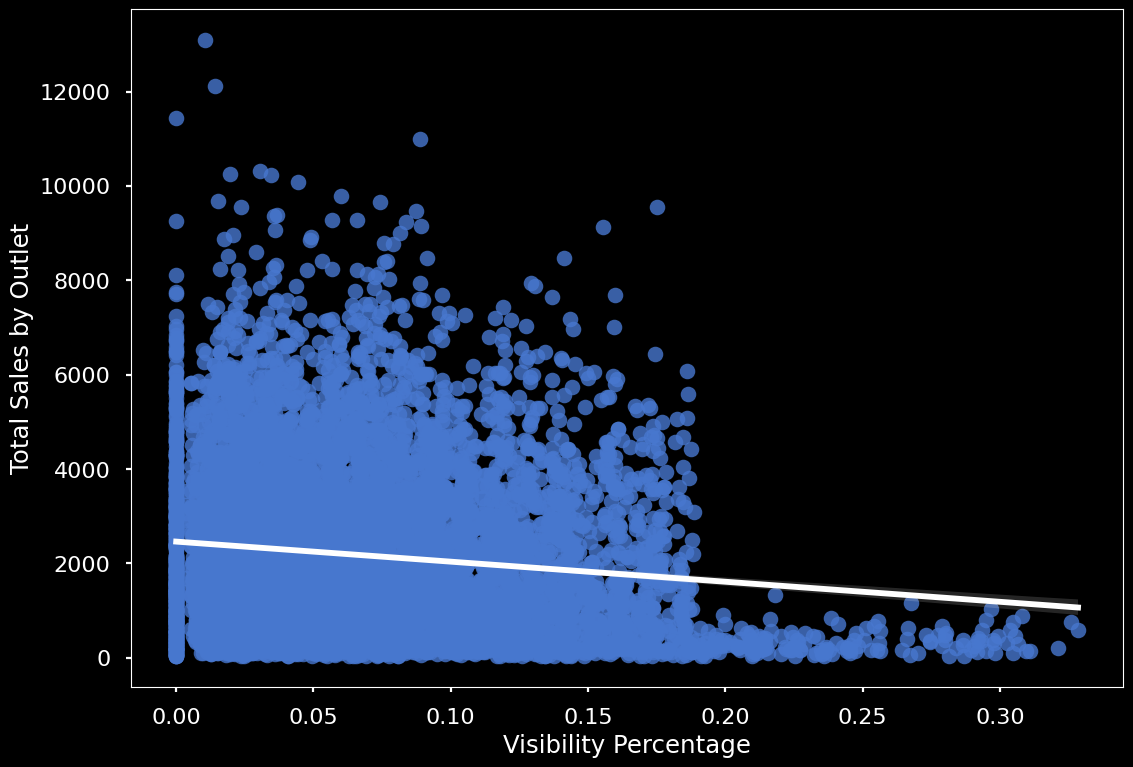

In [37]:
line_kws = dict(color='White')
ax = sns.regplot(data = sales, y = "Total Sales by Outlet", x = 'Visibility Percentage',
line_kws = line_kws)

>  **Though week, there is a negative correlation between these two values**

 -  This is counterintuitive data, but reinforces the concept that correlation does not equal causation

>  We will use countplots to view categorical Data columns
 -  We can skip columns that are made up of mostly unique identifiers

- We will make a countplot for Fat Content

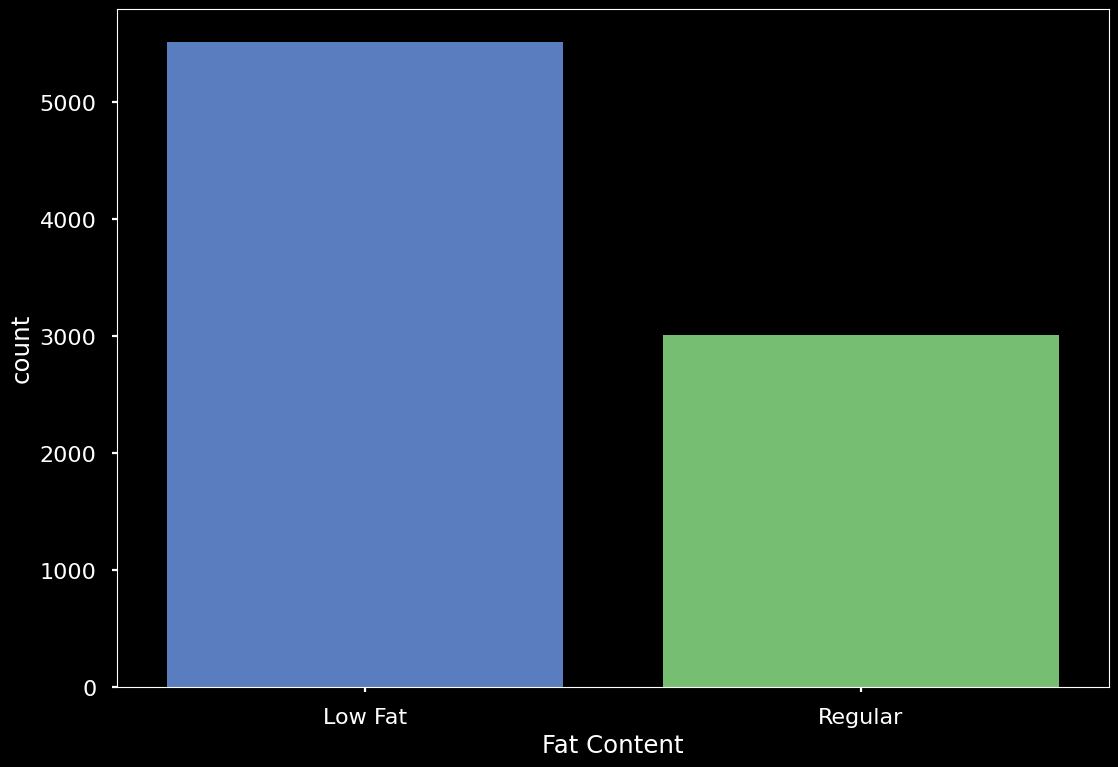

In [38]:
ax = sns.countplot(data = sales, x = 'Fat Content')

>  **In this chart we can see that nearly twice as many values are in the Low Fat category as Regular**

-  Next a countplot for Product Category
 -  This can be enhanced by adding Fat content as the "hue" arguement

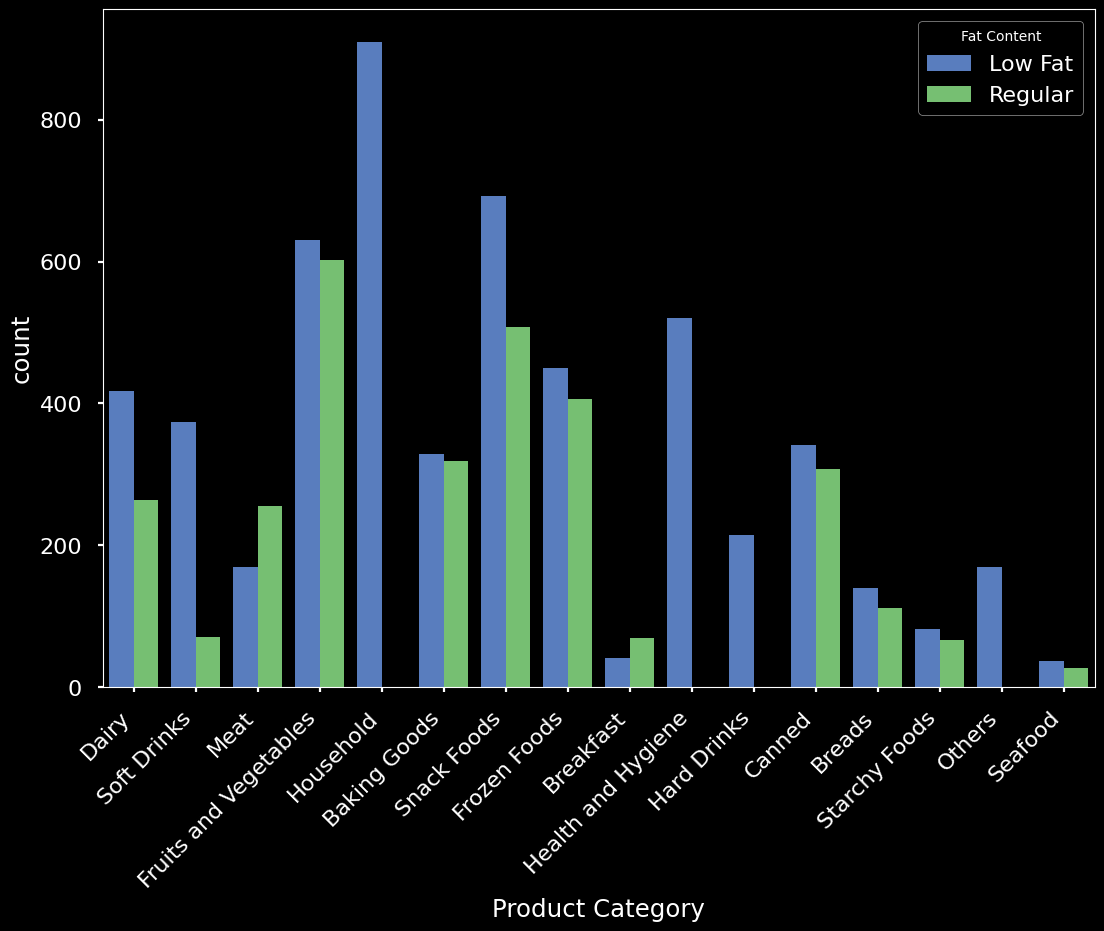

In [39]:
ax = sns.countplot(data = sales, x = 'Product Category', hue = "Fat Content")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

>  **We can see that some some values are not represented by a green line, quickly scanning the name of the column tells us why.**
 *  They appear to be non-food items

####  We can now make a heatmap to show correlation between the numeric features of or Data
*  We will begin by creating a variable called "corr"

In [40]:
# Make a variable for correlations
corr = sales.corr(numeric_only = True)
corr.round(2)

,Weight,Visibility Percentage,List Price,Store Established Year,Total Sales by Outlet
Weight,1.00,-0.08,0.02,0.54,-0.06
Visibility Percentage,-0.08,1.00,-0.00,-0.07,-0.13
List Price,0.02,-0.00,1.00,0.01,0.57
Store Established Year,0.54,-0.07,0.01,1.00,-0.05
Total Sales by Outlet,-0.06,-0.13,0.57,-0.05,1.00


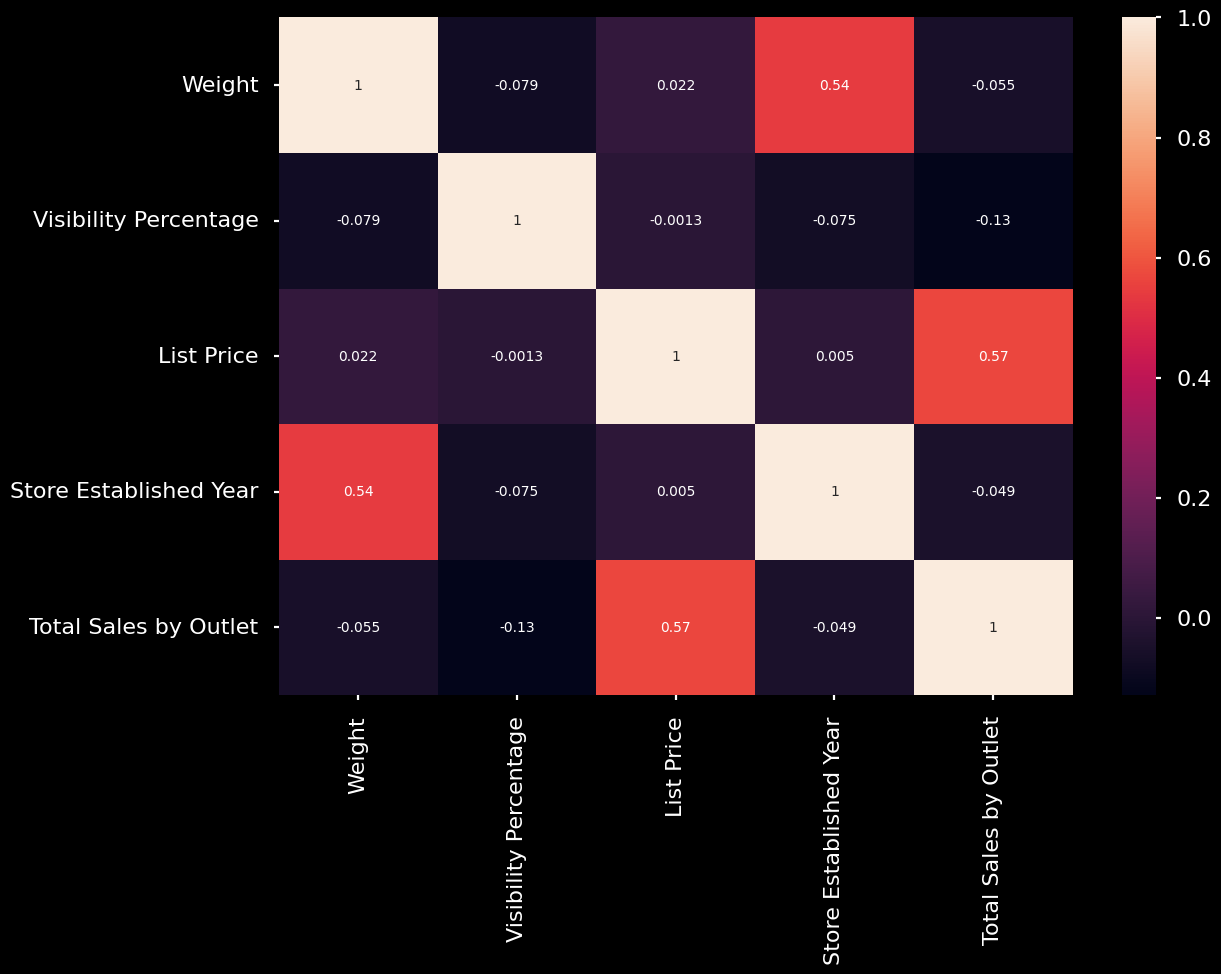

In [41]:
# Use seaborn to make a heatmap of these correlations
sns.heatmap(corr, annot = True);

>  **This graph shows moderate correlation between "List Price" and "Total Sales by Outlet**

-This fact seems *incidental*
>  **The graph also shows moderate positive correlation between "Store Established Year" and "Weight"**

-This fact appears on the surface more *coincidental*